# Plot correlation matrix for CpG modules using DotClustermap

## Processing the data

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
from PyComplexHeatmap import *
from matplotlib.colors import LinearSegmentedColormap

df_corr = pd.read_csv("../data/kycg_modles_correlations.csv",sep='\t',index_col=0)
df_ann = pd.read_csv("../data/kycg_modles_annotations.csv",sep='\t')
df_ann.set_index('CpG',inplace=True)
df_ann.Module=df_ann.Module.astype(str)

In [2]:
df_ann.Module.value_counts().head(10)

4     45
1     30
3     28
9     17
2     17
39    17
37    16
45    13
33    13
6     12
Name: Module, dtype: int64

In [3]:
df_ann.loc[df_ann.Module.isin(['4','1','3','9','2','39','37'])].HM.unique()

array(['H3K4me1;H3K79me2;H3K79me3', 'H3F3A;H4K20me1', nan,
       'H2BK20ac;H3K4me1', 'H3F3A;H3K23me2', 'H2BK20ac', 'H2AFY', 'H3F3A',
       'H4K20me1', 'H2AK9ac;H2BK12ac;H2BK15ac;H2BK20ac;H3K9me1',
       'H3K9me1', 'H3K23me2', 'H2BK120ub', 'H2BK12ac', 'H2AZac;H3K79me1',
       'H2A;H2AZac;H3_4ac;H3K27me1;H3K4me3B;H3K56ac;H3K79me1;H3K9ac_H3K14ac;H3K9K14ac',
       'CENPA;H1.0;H1.4;H2A;H2AFZ;H2AK119;H2AK9ac;H2AZac;H3.3;H3.3,H2A.Z;H3ac;H3K27ac;H3K27me1;H3K4me3;H3K4me3B;H3K79me1;H3K9ac;H3K9ac_H3K14ac;H3K9K14ac;H4;H4ac;H4K5ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac;H4K8ac;HistoneLysineAcetylation;HistoneLysineCrotonylation',
       'H1.0',
       'H3K18cr;H4K16ac;HistoneLysineAcetylation;HistoneLysineCrotonylation',
       'H4K12ac', 'H1.4', 'H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H1.4;H3K79me1;H4ac;H4K12ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H3K23me2;H3K27me3B', 'H4', 'H1.4;H3K79me1',
       'H2AZac;H3;H3K4me3;H3K4me3B;H3K79me1;H4K5ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H2AK9ac;H3K79me1;H

In [4]:
df_corr.head()

,cg04735237,cg00643814,cg24865495,cg25376651,cg27485084,cg12609052,cg07354679,cg02592525,cg12747056,cg17718960,...,cg19987665,cg18406033,cg09678971,cg00461612,cg18689454,cg11923631,cg27251412,cg08089567,cg16717549,cg09510531
cg04735237,1.000000,0.559916,0.686845,0.561415,0.699960,0.711086,0.563690,0.527953,0.621757,0.623319,...,0.048462,0.103904,-0.002533,0.074093,-0.114526,-0.151763,-0.140823,-0.117356,-0.100510,-0.126291
cg00643814,0.559916,1.000000,0.538034,0.568960,0.687787,0.593650,0.676068,0.606604,0.589549,0.747987,...,-0.185989,-0.087952,-0.242909,-0.065101,-0.054958,-0.096098,-0.089246,-0.078234,-0.025965,-0.069120
cg24865495,0.686845,0.538034,1.000000,0.614696,0.646452,0.786480,0.602911,0.519926,0.642344,0.642081,...,0.022499,0.108524,-0.015151,0.028957,-0.274560,-0.302464,-0.284823,-0.265835,-0.262931,-0.268134
cg25376651,0.561415,0.568960,0.614696,1.000000,0.564983,0.727579,0.624186,0.416198,0.505130,0.596338,...,-0.030346,0.122412,-0.063630,-0.007048,-0.197339,-0.226034,-0.218230,-0.180297,-0.181867,-0.204431
cg27485084,0.699960,0.687787,0.646452,0.564983,1.000000,0.655515,0.599935,0.590981,0.627786,0.674095,...,-0.020895,0.058742,-0.078318,0.055019,-0.139691,-0.168351,-0.160081,-0.142216,-0.114554,-0.144024


In [5]:
df_ann.head()

,Module,ChromHMM,ChromHMM_bioc,HM,TFBS,genes
CpG,,,,,,
cg04735237,1,TxWk,TxWk,H3K4me1;H3K79me2;H3K79me3,HDGF;RBFOX2;SREBF1,PQBP1
cg00643814,1,Quies,Quies,H3F3A;H4K20me1,ASCL1;CASZ1;EBF1;FEZF1;FOXM1;HAND2;HDAC3;IRF2BP2;ISL1;MAFB;NEUROG2;NKX3-1;OSR2;PAX6;PAXIP1;PDX1;PHOX2B;PRDM4;PRDM6;RBBP4;SCRT1;SIX1;SMARCA2;SMC1A-B;SP140L;TSHZ1;WT1;ZBTB21;ZBTB44;ZBTB7B;ZBTB8A;ZNF10;ZNF189;ZNF2;ZNF213;ZNF335;ZNF35;ZNF366;ZNF528;ZNF561;ZNF580;ZNF629;ZNF843;ZXDB,NaN
cg24865495,1,Quies,Quies,NaN,CRX;DNMT3B;OTX2;RORB;ZMYND11;ZNF711,MACROD1
cg25376651,1,Quies,Quies,H2BK20ac;H3K4me1,ATF2;BATF;ETV6;FOS;IKZF2;IRF4;JUNB;MAF;MAFG;MEF2B;NFATC3;NFE2L2;NR1H2;PPARG;RELB;SKIL;SMAD3-HIF1A;SMARCA5;SMARCD3;TBX21;TERF1;TRIM22;ZFP36,FRY
cg27485084,1,Quies,Quies,H3F3A;H3K23me2,PDX1,NaN


In [6]:
df_ann=df_ann.loc[df_ann.Module.isin(['4','1','3','9','2','39'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]
data=df_corr.stack().reset_index()
data.columns=['X','Y','Correlation']
data['Module']=data.X.map(df_ann.Module.to_dict())
data['ChromHMM']=data.X.map(df_ann.ChromHMM.to_dict())
keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3B']
for hm in keep_hm:
    df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
    data[hm]=data.X.map(df_ann[hm].to_dict())

In [7]:
print(df_ann.shape)
df_ann.head()

(154, 10)


,Module,ChromHMM,ChromHMM_bioc,HM,TFBS,genes,H3K4me1,H3K4me3,H3K27me1,H3K27me3B
CpG,,,,,,,,,,
cg04735237,1,TxWk,TxWk,H3K4me1;H3K79me2;H3K79me3,HDGF;RBFOX2;SREBF1,PQBP1,1,0,0,0
cg00643814,1,Quies,Quies,H3F3A;H4K20me1,ASCL1;CASZ1;EBF1;FEZF1;FOXM1;HAND2;HDAC3;IRF2BP2;ISL1;MAFB;NEUROG2;NKX3-1;OSR2;PAX6;PAXIP1;PDX1;PHOX2B;PRDM4;PRDM6;RBBP4;SCRT1;SIX1;SMARCA2;SMC1A-B;SP140L;TSHZ1;WT1;ZBTB21;ZBTB44;ZBTB7B;ZBTB8A;ZNF10;ZNF189;ZNF2;ZNF213;ZNF335;ZNF35;ZNF366;ZNF528;ZNF561;ZNF580;ZNF629;ZNF843;ZXDB,NaN,0,0,0,0
cg24865495,1,Quies,Quies,NaN,CRX;DNMT3B;OTX2;RORB;ZMYND11;ZNF711,MACROD1,0,0,0,0
cg25376651,1,Quies,Quies,H2BK20ac;H3K4me1,ATF2;BATF;ETV6;FOS;IKZF2;IRF4;JUNB;MAF;MAFG;MEF2B;NFATC3;NFE2L2;NR1H2;PPARG;RELB;SKIL;SMAD3-HIF1A;SMARCA5;SMARCD3;TBX21;TERF1;TRIM22;ZFP36,FRY,1,0,0,0
cg27485084,1,Quies,Quies,H3F3A;H3K23me2,PDX1,NaN,0,0,0,0


In [8]:
print(data.shape)
data.head()

(23716, 9)


,X,Y,Correlation,Module,ChromHMM,H3K4me1,H3K4me3,H3K27me1,H3K27me3B
0,cg04735237,cg04735237,1.000000,1,TxWk,1,0,0,0
1,cg04735237,cg00643814,0.559916,1,TxWk,1,0,0,0
2,cg04735237,cg24865495,0.686845,1,TxWk,1,0,0,0
3,cg04735237,cg25376651,0.561415,1,TxWk,1,0,0,0
4,cg04735237,cg27485084,0.699960,1,TxWk,1,0,0,0


## Plotting the Dot clustermap

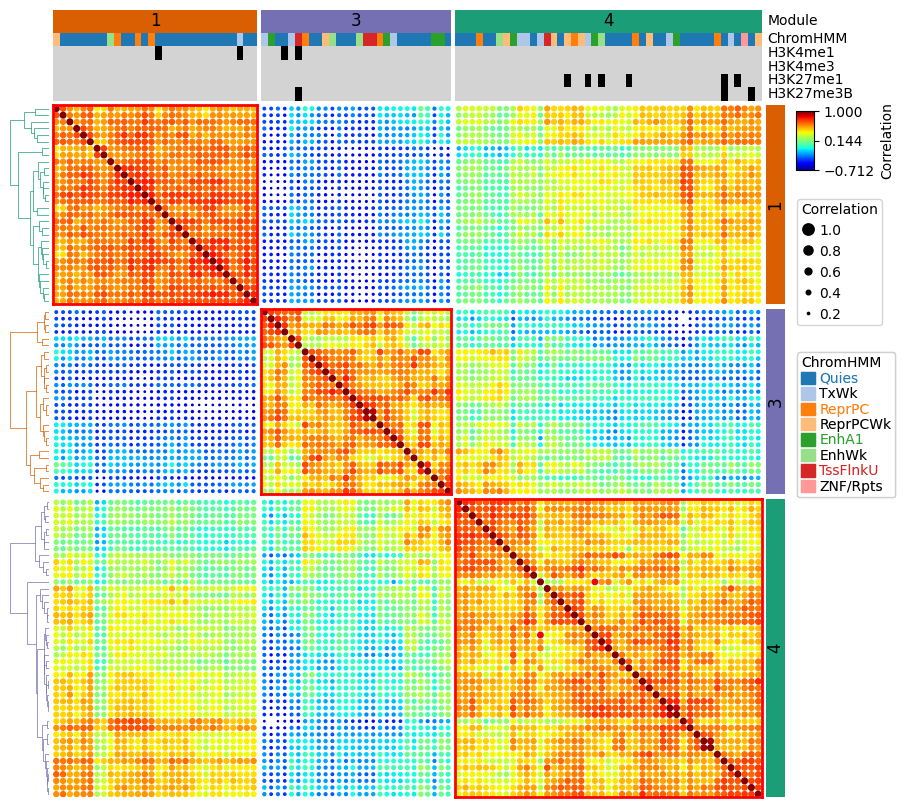

In [21]:
row_ha = HeatmapAnnotation(Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           axis=0,verbose=0,label_kws={'visible':False})

all_cmaps=matplotlib.pyplot.colormaps()
if 'binarize' not in all_cmaps:
    c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
    plt.register_cmap(cmap=c)

col_ha = HeatmapAnnotation(#label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           ChromHMM=anno_simple(df_ann.ChromHMM,cmap='tab20'),
                           H3K4me1=anno_simple(df_ann.H3K4me1,cmap='binarize',legend=False),
                           H3K4me3=anno_simple(df_ann.H3K4me3,cmap='binarize',legend=False),
                           H3K27me1=anno_simple(df_ann.H3K27me1,cmap='binarize',legend=False),
                           H3K27me3B=anno_simple(df_ann.H3K27me3B,cmap='binarize',legend=False),
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(10, 9))
cm = DotClustermapPlotter(data=data, x='X',y='Y',value='Correlation',c='Correlation',s='Correlation',
                          hue='Module', cmap='jet',#cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          #colors={'High':'red','Middle':'purple','Low':'green'},
                          #marker={'4':'P','1':'*','3':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_ann.Module,row_split=df_ann.Module, col_split_gap=1,row_split_gap=1,
                          row_dendrogram=True,legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,
                          tree_kws={'row_cmap':'Dark2'},verbose=0,legend_gap=7,alpha=2,spines=False)
# plot custom spines
for i in range(cm.heatmap_axes.shape[0]):
    for j in range(cm.heatmap_axes.shape[1]):
        if i != j:
            continue
        ax = cm.heatmap_axes[i][j]
        for side in ["top", "right", "left", "bottom"]:
            ax.spines[side].set_visible(True)
            ax.spines[side].set_color('red')
            ax.spines[side].set_linewidth(2)
plt.savefig("dotClustermap.pdf", bbox_inches='tight')
plt.show()

In [10]:
print(data.X.nunique())

154


## A smaller dot clustermap
Another example dot clustermap with a smaller set of cpgs and add spines to the heatmap using parameter `spines=True`.

In [11]:
df_ann=df_ann.loc[df_ann.Module.isin(['4','1','3'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]
data=df_corr.stack().reset_index()
data.columns=['X','Y','Correlation']
data['Module']=data.X.map(df_ann.Module.to_dict())
data['ChromHMM']=data.X.map(df_ann.ChromHMM.to_dict())
keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3B']
for hm in keep_hm:
    df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
    data[hm]=data.X.map(df_ann[hm].to_dict())

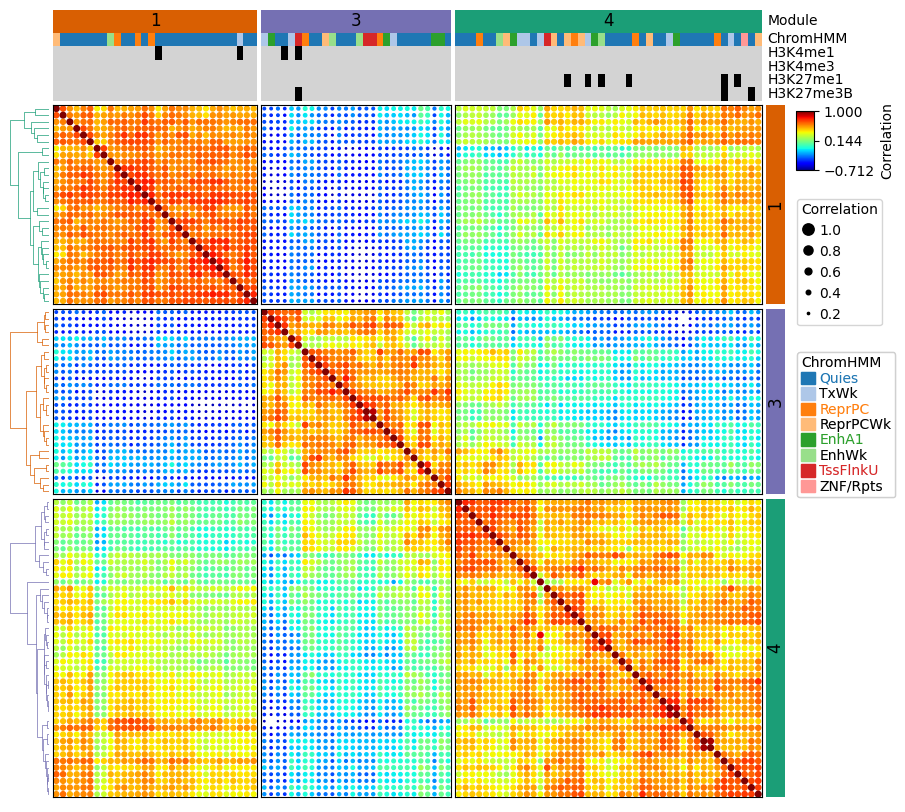

In [12]:
row_ha = HeatmapAnnotation(Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           axis=0,verbose=0,label_kws={'visible':False})

all_cmaps=matplotlib.pyplot.colormaps()
if 'binarize' not in all_cmaps:
    c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
    plt.register_cmap(cmap=c)

col_ha = HeatmapAnnotation(#label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           ChromHMM=anno_simple(df_ann.ChromHMM,cmap='tab20'),
                           H3K4me1=anno_simple(df_ann.H3K4me1,cmap='binarize',legend=False),
                           H3K4me3=anno_simple(df_ann.H3K4me3,cmap='binarize',legend=False),
                           H3K27me1=anno_simple(df_ann.H3K27me1,cmap='binarize',legend=False),
                           H3K27me3B=anno_simple(df_ann.H3K27me3B,cmap='binarize',legend=False),
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(10, 9))
cm = DotClustermapPlotter(data=data, x='X',y='Y',value='Correlation',c='Correlation',s='Correlation',
                          hue='Module', cmap='jet',#cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          #colors={'High':'red','Middle':'purple','Low':'green'},
                          #marker={'4':'P','1':'*','3':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_ann.Module,row_split=df_ann.Module, col_split_gap=1,row_split_gap=1,
                          row_dendrogram=True,legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,
                          tree_kws={'row_cmap':'Dark2'},verbose=0,legend_gap=7,alpha=2,spines=True)
plt.savefig("dotClustermap2.pdf", bbox_inches='tight')
plt.show()